# Text Mining with Python and NLTK
This notebook includes some basic examples of techniques used to analyze text using Python.

Python includes a variety of native support for string-handling and basic text processing, but for deeper analyses you'll need to use a text analytics package like the [natural language toolkit (NLTK)](http://www.nltk.org/). This isn't the only package available (there are others like [SpaCy](https://spacy.io/) and [Gensim](https://radimrehurek.com/gensim/)), but it's one of the most common starting points for exploring text analytics concepts.

## Performing Basic Frequency Analysis
Let's start by using some very basic frequency analysis on a document, and explore the hypothesis that the most frequently occuring words in a given body of text might give us an indication of the subject of the text.

### Load a Text Document
Run the cell below to load a document and view the text it contains.

In [1]:
# Open Moon.txt from the Files folder
doc1 = open("Files/Moon.txt", "r")

# Read the document and print its contents
doc1Txt = doc1.read()
print(doc1Txt)

We set sail on this new sea because there is new knowledge to be gained, and new rights to be won, and they must be won and used for the progress of all people. For space science, like nuclear science and all technology, has no conscience of its own. Whether it will become a force for good or ill depends on man, and only if the United States occupies a position of pre-eminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war. I do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea, but I do say that space can be explored and mastered without feeding the fires of war, without repeating the mistakes that man has made in extending his writ around this globe of ours.
There is no strife, no prejudice, no national conflict in outer space as yet. Its hazards are hostile to us all. Its conquest deserves the best of all mankind, and its opportu

### Normalize the Text
Text includes a lot of punctuation, which we need to remove if we want to work only with the actual words.

Run the cell below to strip all the numerals and punctuation from the text and convert the words to lower case.

In [2]:
from string import punctuation

# remove numeric digits
txt = ''.join(c for c in doc1Txt if not c.isdigit())

# remove punctuation and make lower case
txt = ''.join(c for c in txt if c not in punctuation).lower()

# print the normalized text
print (txt)

we set sail on this new sea because there is new knowledge to be gained and new rights to be won and they must be won and used for the progress of all people for space science like nuclear science and all technology has no conscience of its own whether it will become a force for good or ill depends on man and only if the united states occupies a position of preeminence can we help decide whether this new ocean will be a sea of peace or a new terrifying theater of war i do not say that we should or will go unprotected against the hostile misuse of space any more than we go unprotected against the hostile use of land or sea but i do say that space can be explored and mastered without feeding the fires of war without repeating the mistakes that man has made in extending his writ around this globe of ours
there is no strife no prejudice no national conflict in outer space as yet its hazards are hostile to us all its conquest deserves the best of all mankind and its opportunity for peaceful

### Get the Frequency Distribution
Now let's tokenize the text (split it into individual words), and count the number of times each word occurs.

In [3]:
import nltk
import pandas as pd
from nltk.probability import FreqDist
from IPython.core.display import HTML

# We need the punkt library to tokenize the text
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(txt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
count_frame = count_frame.sort_values('Count', ascending=False)

# Display the dataframe as HTML (so it's not truncated)
display(HTML(count_frame.to_html()))

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Count
the,14
and,12
of,11
to,11
we,9
that,6
be,5
new,5
this,5
are,5


### Visualize Word Frequency
It's often easier to analyze frequency by creating a visualization, such as a Pareto chart.

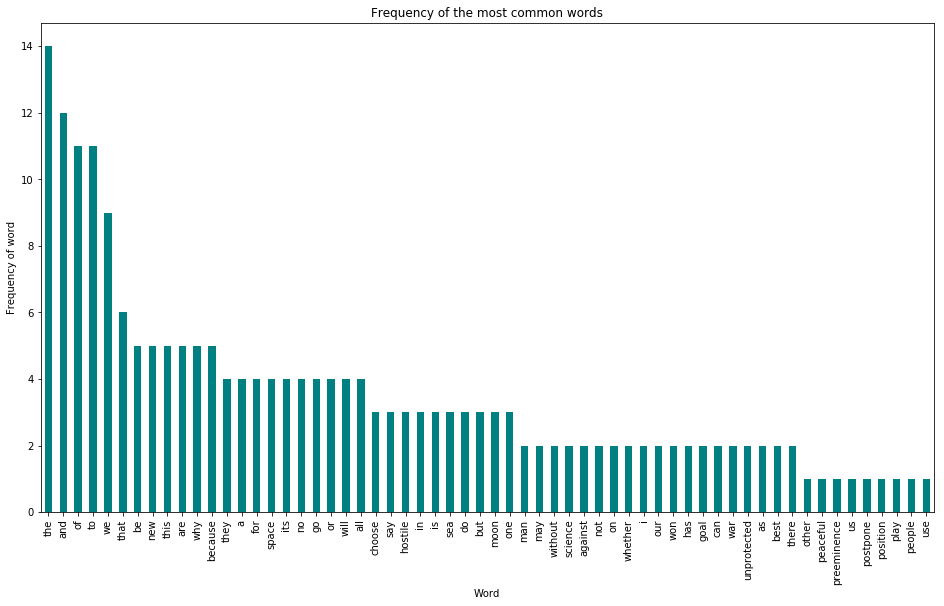

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
count_frame['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Remove Stopwords
A large number of the words in the text are common words like "the" or "and". These "stopwords" add little in the way of semantic meaning to the text, and won't help us determine the subject matter - so run the cell below to remove them.

In [7]:
# Get a set of common stopwords from NLTK
nltk.download("stopwords")
from nltk.corpus import stopwords

# remove stopwords from the text
usefulTxt = ' '.join([word for word in txt.split() if word not in (stopwords.words('english'))])
print("\n")
print(usefulTxt)

[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


set sail new sea new knowledge gained new rights must used progress people space science like nuclear science technology conscience whether become force good ill depends man united states occupies position preeminence help decide whether new ocean sea peace new terrifying theater war say go unprotected hostile misuse space go unprotected hostile use land sea say space explored mastered without feeding fires war without repeating mistakes man made extending writ around globe strife prejudice national conflict outer space yet hazards hostile us conquest deserves best mankind opportunity peaceful cooperation may never come say moon choose goal may well ask climb highest mountain years ago fly atlantic rice play texas choose go moon choose go moon decade things easy hard goal serve organize measure best energies skills challenge one willing accept one unwilling postpone o

### Visualize the Frequency Distribution for the Remaining Words
Now that we've prepared the text, we can tokenize the string into a list of individual words, and then perform frequency analysis on those words based on how often they appear in the text.

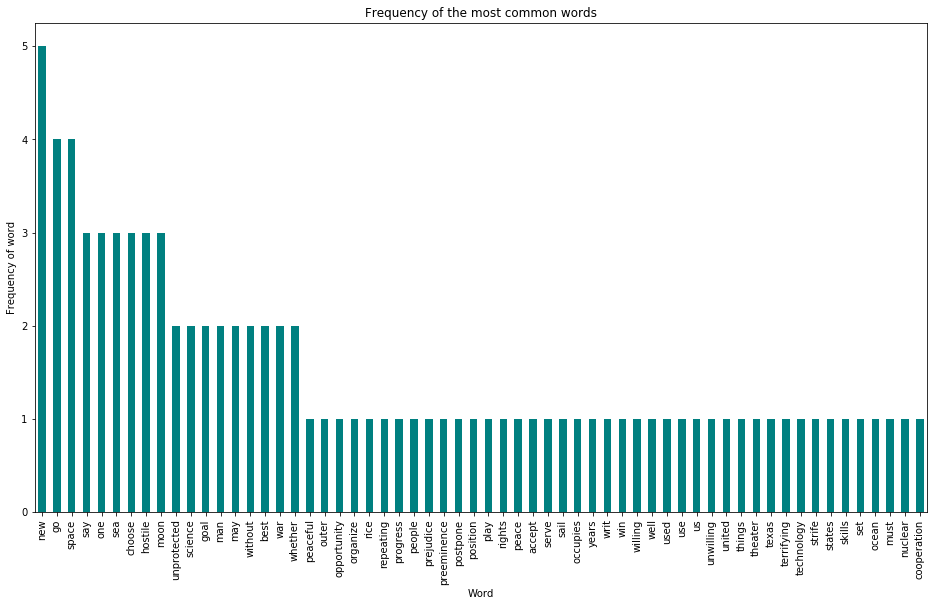

In [9]:
# Get the frequency distribution of the remaining words
usefulWords = nltk.tokenize.word_tokenize(usefulTxt)
fdist = FreqDist(usefulWords)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

The most frequent word is "new", and other common words include "go", "space", "science", and "moon".

## Extracting N-Grams
When we tokenize text, we break it down into components that are generically called *n-grams*. When these n-grams usually consist of individual single words, which are technically known as *unigrams*. In many text analysis scenarios, breaking the text down into n-grams that consist of multiple words can yield more information by providing context. Generating n-grams from text results in a collection of *n*-word strings for each set of consecutive *n* words in the text. For example, consider the text "**the quick brown fox**". Generating two-word n-grams (known as *bigrams*) from this would yield the following collection of strings:

- the quick
- quick brown
- brown fox

### Extract Bigrams
Run the following cell to examine the *moon.txt* document by splitting it into bigrams.

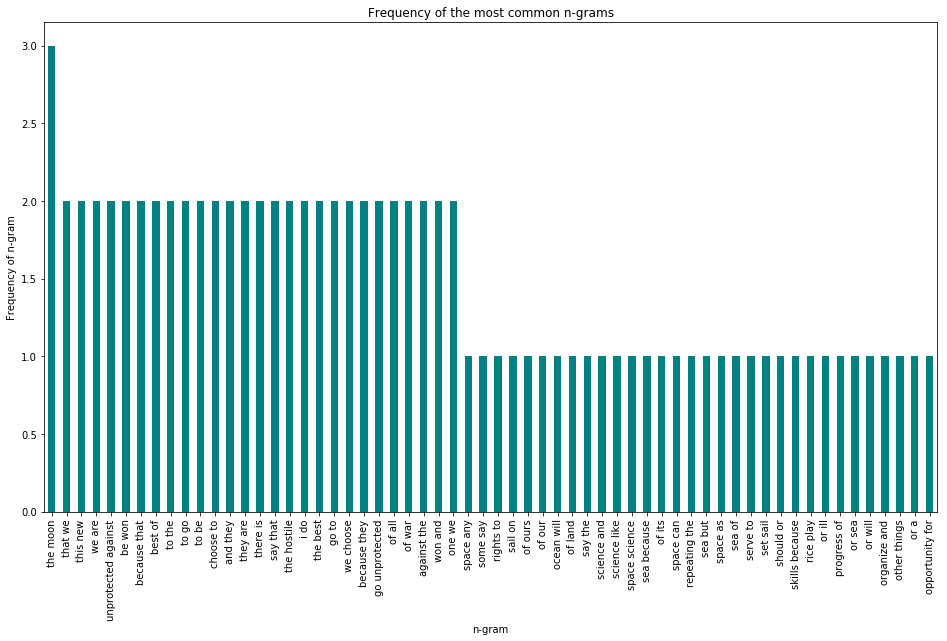

In [11]:
from nltk import ngrams

# Get n-grams where n = 2
n = 2
nGramsInDoc = []
nGrams = ngrams(words, n)
for grams in nGrams:
    nWords = ' '.join(g for g in grams)
    nGramsInDoc.append(nWords)

# Count the frequency of each n-gram
fdist = FreqDist(nGramsInDoc)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 bigrams
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common n-grams')
ax.set_ylabel('Frequency of n-gram')
ax.set_xlabel('n-gram')
plt.show()

Note that the most common bigram is "the moon", which is of course fundamentally what the document is about.
### Extract Trigrams
Let's try exploring n-grams of three words (*trigrams*):

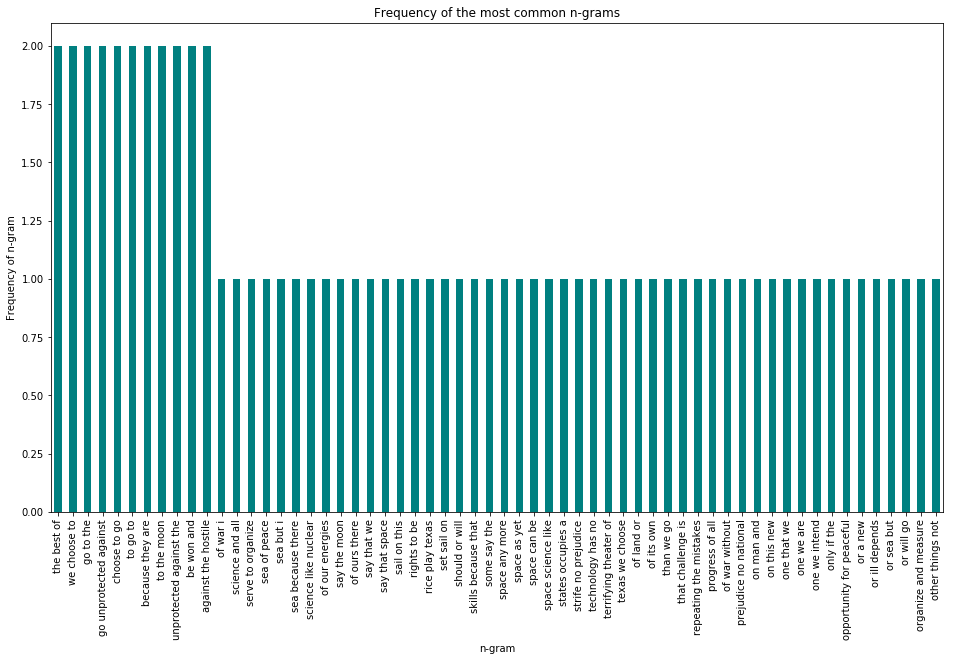

In [12]:
from nltk import ngrams

# Get n-grams where n = 3
n = 3
nGramsInDoc = []
nGrams = ngrams(words, n)
for grams in nGrams:
    nWords = ' '.join(g for g in grams)
    nGramsInDoc.append(nWords)

# Count the frequency of each n-gram
fdist = FreqDist(nGramsInDoc)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot the frequency of the top 60 n-grams
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common n-grams')
ax.set_ylabel('Frequency of n-gram')
ax.set_xlabel('n-gram')
plt.show()

It's a little less definitive, but the most common trigrams include phrases like "go to the", "choose to go", "to go to", and "to the moon".

## Using Term Frequency - Inverse Document Frequency
In the previous example, we've used basic term frequency to determine each word's "importance" based on how often it appears in the document. When dealing with a large corpus of multiple documents, a more commonly used technique is *term frequency, inverse document frequency* (or TF-IDF) in which a score is calculated based on how often a word or term appears in one document compared to its more general frequency across the entire collection of documents. Using this technique, a high degree of relevance is assumed for words that appear frequently in a particular document, but relatively infrequently across a wide range of other documents.

### Load and Some More Documents
Let's add some more documents to our collection. We'll examine some presidential innauguration speeches from former US presidents.

In [13]:
# Get a second document, normalize it, and remove stop words
doc2 = open("Files/FDR.txt", "r")
doc2Txt = doc2.read()
print (doc2Txt)
print("------------------------------------------------")
# Normalize and remove stopwords
txt2 = ''.join(c for c in doc2Txt if not c.isdigit())
txt2 = ''.join(c for c in txt2 if c not in punctuation).lower()
txt2 = ' '.join([word for word in txt2.split() if word not in (stopwords.words('english'))])

# Get a third document, normalize it, and remove stop words
doc3 = open("Files/JFK.txt", "r")
doc3Txt = doc3.read()
print (doc3Txt)
print("------------------------------------------------")
# Normalize and remove stopwords
txt3 = ''.join(c for c in doc3Txt if not c.isdigit())
txt3 = ''.join(c for c in txt3 if c not in punctuation).lower()
txt3 = ' '.join([word for word in txt3.split() if word not in (stopwords.words('english'))])


# and a fourth
doc4 = open("Files/Reagan.txt", "r")
doc4Txt = doc4.read()
print (doc4Txt)
# Normalize and remove stopwords
txt4 = ''.join(c for c in doc4Txt if not c.isdigit())
txt4 = ''.join(c for c in txt4 if c not in punctuation).lower()
txt4 = ' '.join([word for word in txt4.split() if word not in (stopwords.words('english'))])


﻿President Hoover, Mr. Chief Justice, my friends: 

This is a day of national consecration. And I am certain that on this day my fellow Americans expect that on my induction into the Presidency, I will address them with a candor and a decision which the present situation of our people impels.

This is preeminently the time to speak the truth, the whole truth, frankly and boldly. Nor need we shrink from honestly facing conditions in our country today. This great Nation will endure, as it has endured, will revive and will prosper.

So, first of all, let me assert my firm belief that the only thing we have to fear is fear itself -- nameless, unreasoning, unjustified terror which paralyzes needed efforts to convert retreat into advance. In every dark hour of our national life, a leadership of frankness and of vigor has met with that understanding and support of the people themselves which is essential to victory. And I am convinced that you will again give that support to leadership in the

﻿Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens:

We observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn before you and Almighty God the same solemn oath our forebears prescribed nearly a century and three-quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation o

Now let's determine the top 10 most frequent words in each document:

In [14]:
import nltk
import pandas as pd
from nltk.probability import FreqDist

# Create collection of tokenized docs
txtDocs = [txt2, txt3, txt4]
docs = [list(nltk.tokenize.word_tokenize(txtDoc)) for txtDoc in txtDocs]

# Loop through every doc
for i, doc in enumerate(docs):
    print("Top words in document {}:".format(i + 2))
    fdist = FreqDist(doc)
    count_frame = pd.DataFrame(fdist, index =[0]).T
    count_frame.columns = ['Count']
    count_frame = count_frame.sort_values('Count', ascending=False)
    print (count_frame.head(10))
    print('----------------------------')



Top words in document 2:
            Count
national       10
must           10
may             8
people          8
shall           7
action          7
helped          7
us              7
leadership      7
great           6
----------------------------
Top words in document 3:
          Count
let          16
us           12
world         8
sides         8
pledge        7
new           7
power         5
ask           5
citizens      5
shall         5
----------------------------
Top words in document 4:
            Count
us             25
government     16
must           10
believe        10
people          9
americans       9
time            8
one             8
freedom         8
world           8
----------------------------


When you're evaluating word importance across multiple texts in a corpus (or *body* of texts), you need to take into account that the overall frequency of a word for *all* of the texts may not indicate its importance in *individual* documents. For example, the word "us" appears frequently in all of the above speeches, and the words "people", "world", and "must" are also common to more than one document; so these words are not very helpful in determining the subject of a specific individual article.

### Get TF-IDF Values for the top three words in each document
To help find words that are important in an individual document compared to others in the overall corpus, we need to consider several statistics:

- **Term Frequency (TF)**: The relative frequency of a word within an individual document. Term Frequency of a term in a document is the number of occurrences of the term within the document, divided by the total number of terms in the document:

\begin{equation}tf(t,d) = \frac{f_{t,d}}{\mid d \mid}\end{equation}

- **Inverse Document Frequency (IDF)**: The normalized number of documents containing the word. The Inverse Document Frequency of a term is calculated as the normal log of the total number of documents in the corpus divided by the number of documents in the corpus that contain the term:

\begin{equation}idf(t,D) = log \frac{\mid D \mid}{\mid \{ d \in D : t \in d \} \mid}\end{equation}

- **Term Frequency - Inverse Document Frequency (TF-IDF)**: The overall relevance score for the word within an individual document when the entire corpus is taken into consideration. This is calculated as the product of Term Frequency and Inverse Document Frequency:

\begin{equation}tfidf(t,d,D) = tf(t,d) \cdot idf(t,D)\end{equation}

Let's use these statistics to find the top 10 most important words in each document when the entire corpus is taken into consideration.

In [15]:
# Create a function to calculate TF-IDF
def get_tfidf(term, text, corpus):
    import math
    
    # Calculate TF as term occurrences / terms in text
    wordCount = text.count(term)
    tf = wordCount/len(text)
    
    # Calculate IDF as log(texts in corpus) / texts containing term
    docCount = 0
    for cDoc in corpus:
        if term in cDoc:
            docCount = docCount + 1
    idf = math.log(len(corpus)/docCount)
    
    # Calculate TF-IDF and the product of TF and IDF
    return tf*idf


# Create collection of tokenized docs
txtDocs = [txt2, txt3, txt4]
docs = [list(nltk.tokenize.word_tokenize(txtDoc)) for txtDoc in txtDocs]

# Loop through every doc
for i, doc in enumerate(docs):
    print("Top words in document {}:".format(i + 2))
    
    # Get the tfidf for each word in this doc
    scores = {word: get_tfidf(word, doc, docs) for word in doc}
    
    # Sort the scored words for this doc in reverse order of score
    sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
    
    # print out the top 10 scoring words in this doc
    for word, score in sorted_words[:10]:
        print("\t{}, TF-IDF: {}".format(word, round(score, 5)))


Top words in document 2:
	leadership, TF-IDF: 0.00814
	helped, TF-IDF: 0.00814
	money, TF-IDF: 0.00581
	face, TF-IDF: 0.00465
	task, TF-IDF: 0.00465
	emergency, TF-IDF: 0.00465
	measures, TF-IDF: 0.00465
	respects, TF-IDF: 0.00465
	discipline, TF-IDF: 0.00465
	duty, TF-IDF: 0.00465
Top words in document 3:
	arms, TF-IDF: 0.00631
	poverty, TF-IDF: 0.00474
	globe, TF-IDF: 0.00474
	dare, TF-IDF: 0.00474
	control, TF-IDF: 0.00474
	join, TF-IDF: 0.00474
	final, TF-IDF: 0.00474
	sides, TF-IDF: 0.00466
	forebears, TF-IDF: 0.00316
	century, TF-IDF: 0.00316
Top words in document 4:
	government, TF-IDF: 0.00563
	called, TF-IDF: 0.00477
	heroes, TF-IDF: 0.00477
	among, TF-IDF: 0.00381
	dreams, TF-IDF: 0.00381
	believe, TF-IDF: 0.00352
	think, TF-IDF: 0.00286
	maintaining, TF-IDF: 0.00286
	individual, TF-IDF: 0.00286
	greater, TF-IDF: 0.00286


## Stemming and Lemmatization
Until now, we've simply counted the number of occurrances of each word. This doesn't take into account the fact that sometimes multiple words may be based on the same common base, or *stem*; and may be semantically equivalent. For example, "fishes", "fished", "fishing", and "fisher" are all derived from the stem "fish".

### View frequency of words from Kennedy's inauguration speech
Let's take another look at JFKs innauguration speech, and count the unstemmed words it contains.

﻿Vice President Johnson, Mr. Speaker, Mr. Chief Justice, President Eisenhower, Vice President Nixon, President Truman, reverend clergy, fellow citizens:

We observe today not a victory of party, but a celebration of freedom -- symbolizing an end, as well as a beginning -- signifying renewal, as well as change. For I have sworn before you and Almighty God the same solemn oath our forebears prescribed nearly a century and three-quarters ago.

The world is very different now. For man holds in his mortal hands the power to abolish all forms of human poverty and all forms of human life. And yet the same revolutionary beliefs for which our forebears fought are still at issue around the globe -- the belief that the rights of man come not from the generosity of the state, but from the hand of God.

We dare not forget today that we are the heirs of that first revolution. Let the word go forth from this time and place, to friend and foe alike, that the torch has been passed to a new generation o

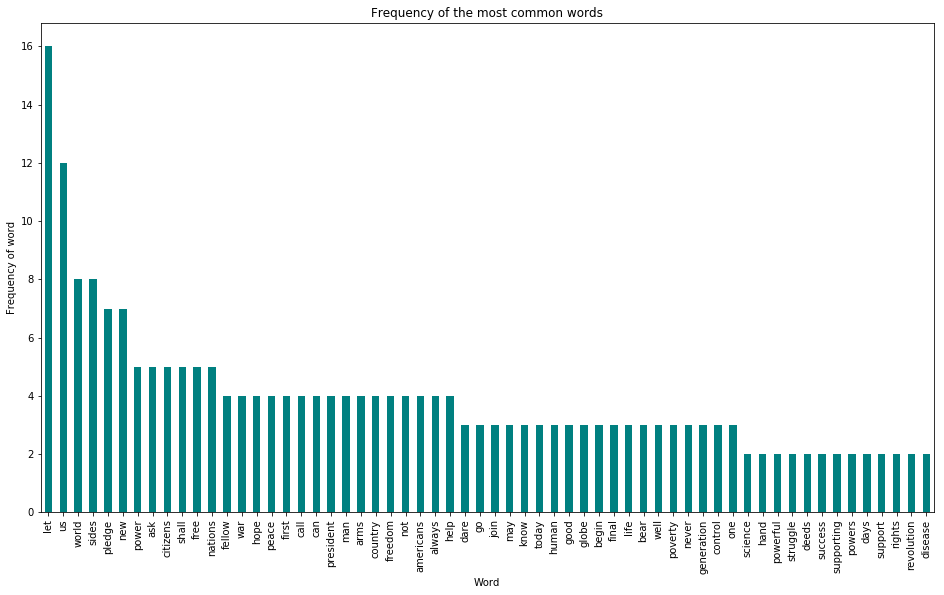

In [16]:
print(doc3Txt)

# Normalize and remove stop words
from string import punctuation
doc3Txt = ''.join(c for c in doc3Txt if not c.isdigit())
doc3Txt = ''.join(c for c in doc3Txt if c not in punctuation).lower()
doc3Txt = ' '.join([word for word in doc3Txt.split() if word not in (stopwords.words('english'))])

# Get Frequency distribution
words = nltk.tokenize.word_tokenize(doc3Txt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

### Stem the words
Now let's stem the words and count the stems.

There are various common stemming techniques, including the *Porter* and *Snowball* stemming algorithms; both of which are supported in NLTK. Let's start with the Porter stemmer:

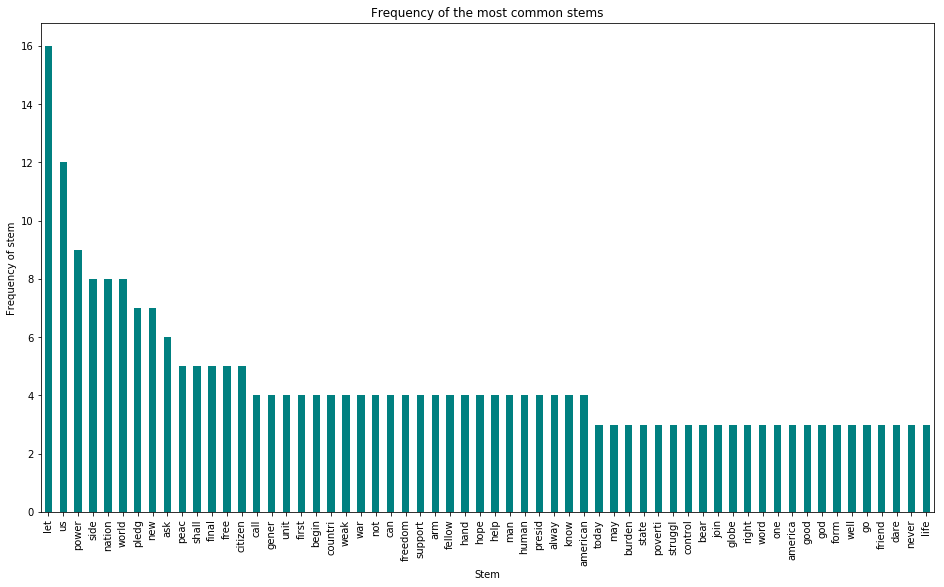

In [19]:
from nltk.stem.porter import PorterStemmer

# Get the word stems
ps = PorterStemmer()
stems = [ps.stem(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common stems')
ax.set_ylabel('Frequency of stem')
ax.set_xlabel('Stem')
plt.show()

Now let's try the Snowball stemmer:

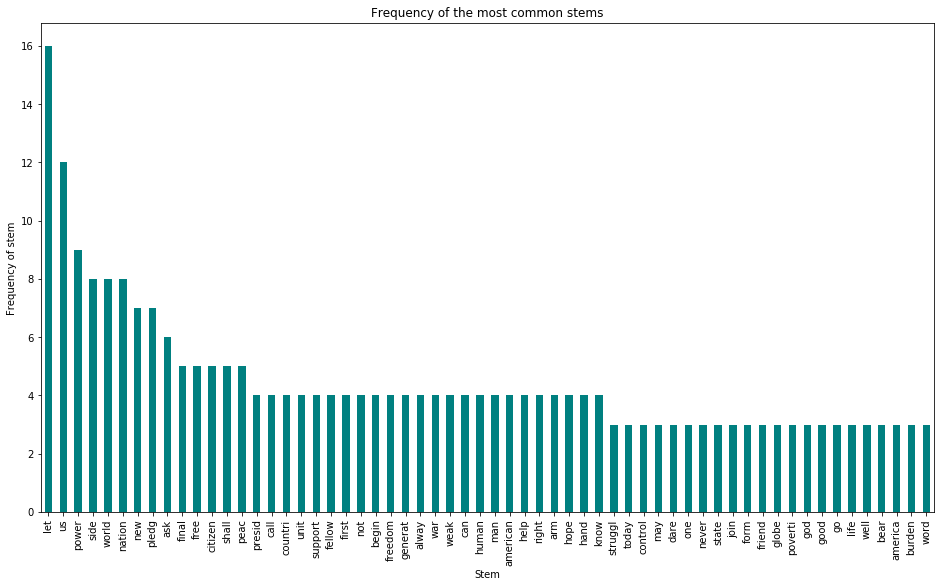

In [18]:
from nltk.stem.snowball import SnowballStemmer

# Get the word stems
ss = SnowballStemmer("english")
stems = [ss.stem(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(stems)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common stems')
ax.set_ylabel('Frequency of stem')
ax.set_xlabel('Stem')
plt.show()

Both stemmers give similar results.

Now, compare the frequencies of the stems to the unstemmed words. Note in particular that the unstemmed words include "power", "powers", and "powerful", which are all stemmed to "power". Additionally, the text includes "nations" and "nation" - which also have a common stem.

### Lemmatize the Words
Stemming can result in some stems that aren't actually words - for example the Porter stemmer used in the previous example produces the stems "*gener*", "*countri*", and "*presid*". *Lemmatization* is a technique used to find common root (*lemma*) word for multiple derived words, with the restriction that the lemma itself must be present in a dictionary of known words. Let's try lemmatizing Kennedy's innauguration speech using the **WordNet** dictionary to verify the lemmas that are found.

[nltk_data] Downloading package wordnet to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


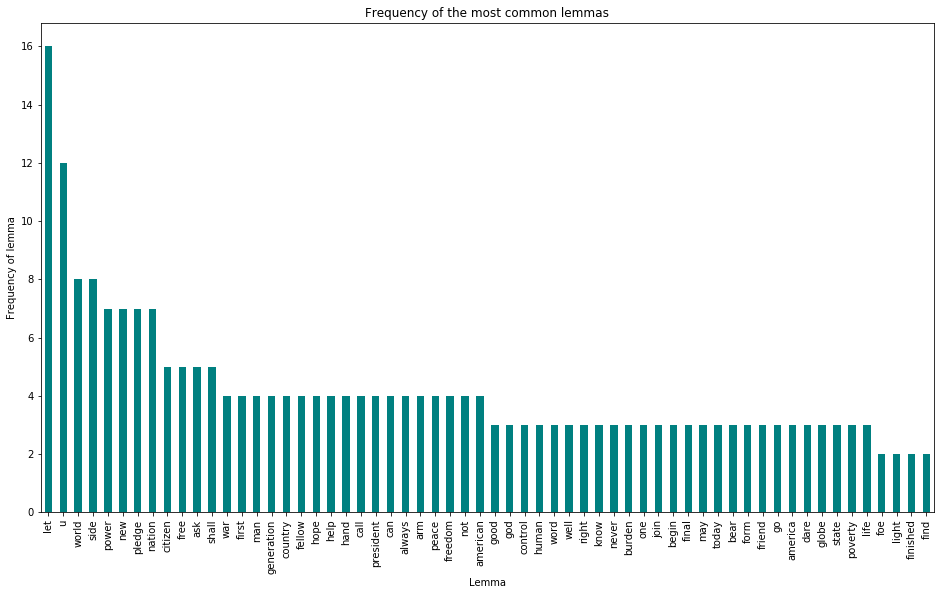

In [20]:
from nltk import WordNetLemmatizer
nltk.download("wordnet")

# Get the word stems
lem = WordNetLemmatizer()
lemmas = [lem.lemmatize(word) for word in words]

# Get Frequency distribution
fdist = FreqDist(lemmas)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

# Plot frequency
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='teal')
ax.set_title('Frequency of the most common lemmas')
ax.set_ylabel('Frequency of lemma')
ax.set_xlabel('Lemma')
plt.show()

This time, the terms found are all words in ther own right (note that they include  "*generation*", "*country*", and "*president*"), but arguably these lemmas are less useful for determing the key terms in the document. In practice, you generally need to experiment and apply the stemmer or lemmatizer (or both) that best suits your text and purpose.

## Extracting Key Phrases
So far, we've tried to determine the subject of a document by counting the frequency of words, n-grams, and stems or lemmas; with variable success. The problem, especially with very large texts, is that there may be a huge number of semantically useless words; not all of which can be easily filtered out by removing stopwords.

The next level of text analytics requires going beyond simple word counts and identifying *key phrases* in the text.

### Using Collocations
One approach we can take is to identify n-grams of words that occur frequently together. These are known as collocations.

For example, the following code finds trigram collocations that occur at least three times in President Ronald Reagan's innauguration speech, and then based on a statistical measurement of collocation called Pointwise Mutual Information (PMI), it returns the top ten scoring trigrams.

In [21]:
import nltk
from nltk.collocations import *

doc5 = open("Files/Reagan.txt", "r")
doc5Txt = doc5.read()

from string import punctuation
doc5Txt = ''.join(c for c in doc5Txt if not c.isdigit())
doc5Txt = ''.join(c for c in doc5Txt if c not in punctuation)

# Get Frequency distribution
words = nltk.tokenize.word_tokenize(doc5Txt.lower())

trigram_measures = nltk.collocations.TrigramAssocMeasures()

# find trigrams
finder = TrigramCollocationFinder.from_words(words)

# only trigrams that appear 3+ times
finder.apply_freq_filter(3) 

# return the 10 n-grams with the highest PMI
for phrase in finder.nbest(trigram_measures.pmi, 10):
    print(' '.join(phrase))

it is time
the federal government
all of us
it is a
we are a


The code identifies four common trigrams in this text, some of which are potentially useful in discerning what the text is about ("it is time", "the federal government", and "all of us" give at least a flavor of the speech). However, there are also some fairly useless trigrams ("it is a" and "we are a").

Let's try the same approach with another famous speech:

In [22]:
import nltk
from nltk.collocations import *

doc6 = open("Files/Gettysburg.txt", "r")
doc6Txt = doc6.read()

from string import punctuation
doc6Txt = ''.join(c for c in doc6Txt if not c.isdigit())
doc6Txt = ''.join(c for c in doc6Txt if c not in punctuation)

# Get Frequency distribution
words = nltk.tokenize.word_tokenize(doc6Txt.lower())

trigram_measures = nltk.collocations.TrigramAssocMeasures()

# find trigrams
finder = TrigramCollocationFinder.from_words(words)

# only trigrams that appear 3+ times
finder.apply_freq_filter(3) 

# return the 10 n-grams with the highest PMI
for phrase in finder.nbest(trigram_measures.pmi, 10):
    print(' '.join(phrase))

we can not


This time the results tell us very little about the subject of the text. One of the problems with this approach is that the results are limited to n-word phrases based on the n-gram collocations you specify - in this case, our trigram collocations result in three-word phrases. In reality, key phrases can be of variable length.

### Applying Grammatical Rules
To detect and understand variable-length phrases, the code needs to encapsulate some kind of grammatical understanding of the text.

#### Parts of Speech Tagging
Text understanding begins with categorizing words and phrases based on word types, such as nouns, verbs, adjectives, and so on. The following code splits the Gettysburg addressinto sentences, and then for each sentence it tokenizes the words and tags them with the appropriate parts of speech descriptor. The output is list of words for each sentence, and each word has a tag such as *NN* (noun), *PRP* (preposition), *DT* (determiner), *VBN* (verb, past participle), and so on based on the tags defined in the [*Penn Treebank Project*](http://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html).

In [23]:
from nltk import pos_tag
from string import punctuation

nltk.download("averaged_perceptron_tagger")

doc6 = open("Files/Gettysburg.txt", "r")
doc6Txt = doc6.read()

sentences = nltk.tokenize.sent_tokenize(doc6Txt)
print("\nPOS Tags:")
for sentence in sentences:
    sentence = ''.join(c for c in sentence if not c.isdigit())
    sentence = ''.join(c for c in sentence if c not in punctuation)
    words = nltk.tokenize.word_tokenize(sentence)
    pos_tokens = nltk.pos_tag(words)
    print(pos_tokens)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nbuser/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.

POS Tags:
[('Four', 'CD'), ('score', 'NN'), ('and', 'CC'), ('seven', 'CD'), ('years', 'NNS'), ('ago', 'RB'), ('our', 'PRP$'), ('fathers', 'NNS'), ('brought', 'VBN'), ('forth', 'RB'), ('on', 'IN'), ('this', 'DT'), ('continent', 'NN'), ('a', 'DT'), ('new', 'JJ'), ('nation', 'NN'), ('conceived', 'VBN'), ('in', 'IN'), ('Liberty', 'NNP'), ('and', 'CC'), ('dedicated', 'VBN'), ('to', 'TO'), ('the', 'DT'), ('proposition', 'NN'), ('that', 'IN'), ('all', 'DT'), ('men', 'NNS'), ('are', 'VBP'), ('created', 'VBN'), ('equal', 'JJ')]
[('Now', 'RB'), ('we', 'PRP'), ('are', 'VBP'), ('engaged', 'VBN'), ('in', 'IN'), ('a', 'DT'), ('great', 'JJ'), ('civil', 'JJ'), ('war', 'NN'), ('testing', 'VBG'), ('whether', 'IN'), ('that', 'DT'), ('nation', 'NN'), ('or', 'CC'), ('any', 'DT'), ('nation', 'NN'), ('so', 'RB'), ('conceived', 'JJ'), ('and', 

### Extracting Noun Phrases
Now that we know how to tag the parts of speech in the document, we can think of each sentence as being a tree of tagged words. For example, the following tree shows a sentence (S) containing the words "The big dog barked":

(S

    *The*/DT
    *big*/JJ
    *dog*/NN
    *barked*/VBN
)

We can apply rules that govern sequences of tag types to define a grammar, and use that grammar to detect phrases in the text. For example, we might define a *noun* phrase as consisting of an optional determiner (such as "a" or "the"), zero or more adjectives (such as "big" or "great"), and a noun (such as "dog" or "truck"). We can then parse the text to find *chunks* of text that match this grammar as subtrees within sentences:

(S

    (NP
        *The*/DT
        *big*/JJ
        *dog*/NN
     )
    *barked*/VBN
)

We can use this ability to define grammars and detect chuncks of text that match them to extract specific types of phrases. For example, the following code extracts noun phrases from the Gettysburg address.

In [24]:
from nltk import pos_tag
from string import punctuation

nltk.download("averaged_perceptron_tagger")

# Define the grammar for a noun phrase
grammar = "NP: {<DT>?<JJ>*<NN>}"
parser = nltk.RegexpParser(grammar)

doc6 = open("Files/Gettysburg.txt", "r")
doc6Txt = doc6.read()

# Split the document into sentences
sentences = nltk.tokenize.sent_tokenize(doc6Txt.lower())

noun_phrases = []

# Each tagged sentence consists of an "S" root with POS tagged words and "NP" noun phrase branches
print('\nSentence Trees\n------------------')
for sentence in sentences:
    # Normalize the text
    sentence = ''.join(c for c in sentence if not c.isdigit())
    sentence = ''.join(c for c in sentence if c not in punctuation)
    
    # Get the individual words
    words = nltk.tokenize.word_tokenize(sentence)
    
    # Tag the parts of speech
    pos_tokens = nltk.pos_tag(words)
    
    # Parse the tagged words
    parsed_sentence = parser.parse(pos_tokens)
    print(parsed_sentence)
    
    for chunk in parsed_sentence.subtrees():
        # Find the NP subtrees - these are noun phrases
        if chunk.label() == 'NP':
            # Assemble the phrase from its constituent words
            noun_phrase = []
            for word in chunk:
                noun_phrase.append(word[0])
            # Add the phrase to the list of noun phrases found in the document
            noun_phrases.append(' '.join(noun_phrase))

# Print the extracted noun phrases (the NP branches in the sentence trees)            
print('\nNoun Phrases\n------------------')
for phrase in noun_phrases:
    print(phrase)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nbuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!

Sentence Trees
------------------
(S
  four/CD
  (NP score/NN)
  and/CC
  seven/CD
  years/NNS
  ago/RB
  our/PRP$
  fathers/NNS
  brought/VBN
  forth/RB
  on/IN
  (NP this/DT continent/NN)
  (NP a/DT new/JJ nation/NN)
  conceived/VBN
  in/IN
  (NP liberty/NN)
  and/CC
  dedicated/VBN
  to/TO
  (NP the/DT proposition/NN)
  that/IN
  all/DT
  men/NNS
  are/VBP
  created/VBN
  equal/JJ)
(S
  now/RB
  we/PRP
  are/VBP
  engaged/VBN
  in/IN
  (NP a/DT great/JJ civil/JJ war/NN)
  testing/VBG
  whether/IN
  (NP that/DT nation/NN)
  or/CC
  (NP any/DT nation/NN)
  so/RB
  conceived/JJ
  and/CC
  so/RB
  dedicated/JJ
  can/MD
  long/RB
  endure/VB)
(S
  we/PRP
  are/VBP
  met/VBN
  on/IN
  (NP a/DT great/JJ battlefield/NN)
  of/IN
  (NP that/DT war/NN))
(S
  we/PRP
  have/VBP
  come/VBN
  to/TO
  dedi

### Working with Vocabularies
Previously, we tagged all of the words in the text; which makes sense when trying to find sequences of words that represent phrases. However, sometimes it makes sense to consider the set of distinct words in the document, which represents the *vocabulary* of the document.

The following code identifies the vocabulary of the Gettysburg address, and tags the words in the vocabulary.

In [25]:
import nltk
nltk.download("punkt")
from string import punctuation

doc6 = open("Files/Gettysburg.txt", "r")
doc6Txt = doc6.read()

doc6Txt = ''.join(c for c in doc6Txt if not c.isdigit())
doc6Txt = ''.join(c for c in doc6Txt if c not in punctuation)

# Tokenize the words
words = nltk.tokenize.word_tokenize(doc6Txt.lower())

# Tag the words
pos_tokens = nltk.pos_tag(words)

# Get the vocabulary
vocab = set(pos_tokens)

print ("\nTotal words: %i" % len(pos_tokens))
print ("Vocabulary: %i" % len(vocab))

# Tag the vocabulary
print("\nTagged Vocabulary")
print(sorted(vocab))

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!

Total words: 271
Vocabulary: 144

Tagged Vocabulary
[('a', 'DT'), ('above', 'IN'), ('add', 'VB'), ('advanced', 'JJ'), ('ago', 'RB'), ('all', 'DT'), ('altogether', 'RB'), ('and', 'CC'), ('any', 'DT'), ('are', 'VBP'), ('as', 'IN'), ('battlefield', 'NN'), ('be', 'VB'), ('before', 'IN'), ('birth', 'NN'), ('brave', 'NN'), ('brought', 'VBN'), ('but', 'CC'), ('by', 'IN'), ('can', 'MD'), ('cause', 'NN'), ('civil', 'JJ'), ('come', 'VBN'), ('conceived', 'JJ'), ('conceived', 'VBN'), ('consecrate', 'VB'), ('consecrated', 'VBN'), ('continent', 'NN'), ('created', 'VBN'), ('dead', 'JJ'), ('dead', 'NN'), ('dedicate', 'VB'), ('dedicated', 'JJ'), ('dedicated', 'VBN'), ('detract', 'VB'), ('devotion', 'NN'), ('did', 'VBD'), ('died', 'VBN'), ('do', 'VB'), ('earth', 'NN'), ('endure', 'VB'), ('engaged', 'VBN'), ('equal', 'JJ'), ('far', 'RB'), ('fathers', 'NNS'), ('field', 'NN'), ('final', 'J

*Note: Some words may have multiple uses. For example, "train" can be a verb ("I plan to train my dog to sit") or a verb ("I took a train to Paris"). By tagging all of the words before distilling them into a vocabulary set, you included all meanings of the words - for example "conceived" is included both as an adjective and a past-tense verb.*

### Extracting Named Entities
One specific type of word is a *named entity* - in other words a word or phrase that identifies an individual person (such as "Satya Nadella"), organization (for example, "Microsoft"), or geographical location ("United States"). NLTK includes a chunker that detects named entity chunks and labels them as PERSON, ORGANIZATION, or GPE, as shown by the following code:

In [26]:
import nltk
from nltk import pos_tag, ne_chunk

nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download('maxent_ne_chunker')
nltk.download('words')

doc6 = open("Files/JFK.txt", "r")
doc6Txt = doc6.read()

sentences = nltk.sent_tokenize(doc6Txt)

print("\nNamed entity chunks:")
people = []
places = []
organizations = []
for sentence in sentences:
    # Find NE chunks
    for chunk in ne_chunk(pos_tag(nltk.word_tokenize(sentence))):
        # Check for a label
        if hasattr(chunk, 'label'):
            print(chunk)
            # Which tyupe of named entity was found?
            if chunk.label() == 'PERSON':
                people.append(' '.join(c[0] for c in chunk))
            elif chunk.label() == 'GPE':
                places.append(' '.join(c[0] for c in chunk))
            elif chunk.label() == 'ORGANIZATION':
                organizations.append(' '.join(c[0] for c in chunk))
                
# Print out the consolidated results
print("\nPeople:")
for person in sorted(set(people)):
    print("\t", person)
print("Places:")
for place in sorted(set(places)):
    print("\t", place)
print("Organizations:")
for organization in sorted(set(organizations)):
    print("\t", organization)

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/nbuser/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/nbuser/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.

Named entity chunks:
(PERSON Johnson/NNP)
(PERSON Mr./NNP Speaker/NNP)
(PERSON Mr./NNP)
(PERSON Eisenhower/NNP)
(PERSON Nixon/NNP)
(PERSON Truman/NNP)
(PERSON Almighty/NNP God/NNP)
(GPE Americans/NNPS)
(GPE United/NNP)
(ORGANIZATION Communists/NNPS)
(ORGANIZATION Americas/NNPS)
(ORGANIZATION United/NNP Nations/NNPS)
(GPE Isaiah/NNP)
(ORGANIZATION Administration/NNP)
(GPE Americans/NNPS)
(GPE North/NNP)
(GPE South/NNP)
(GP

As you can see, the results are less than perfect, but some named entities have been successfully identified.

## Text Classification
One of the most common uses of text analytics is to associate documents with specific categories, or *classes*. Classification is a fundamental form of *supervised machine learning* in which an existing set of documents for which the class *label* is already known is used to train a predictive model that operates on the *features* of a document in order to predict the appropriate class label.

To explore this, we'll work with a commonly used set of sample files - the **20newsgroups** datase, which contains sample postings from twenty newsnet newsgroups.

*A note for younger readers - back in the early days of the Internet, before social media was called "social media"; the early cyber-pioneers used **newsgroups** to exchange ideas, ask questions, and generally argue about things of little consequence. These newsgroups were text-based "bulletin boards" that were grouped into hierarchical categories such as **rec.autos** or **comp.os.ms-windows.misc**. If we wanted to save these messages, we used a pre-cursor to the USB stick called a "floppy disk", which was a physical manifestation of the **Save** icon in Microsoft Word!*

### View Training Data
The newsgroups data is available as a sample dataset in the ***SciKit-Learn*** library; which is a commonly used Python library for machine learning.

In [27]:
from sklearn.datasets import fetch_20newsgroups

# The sample data is split into two datasets; one for training a model, and one for testing
# We'll start ny just looking at the training data
train = fetch_20newsgroups(subset='train', shuffle=True)

# The training data includes:
#    - data - one row per document
#    - target - one numeric label per document, representing the class to which the document belongs
#    - target_names - a lookup table of the numeric labels and the corresponding class name

# Count how many documents are in the training set:
print('%i documents' %len(train.data))

# View the class names
print('\nClasses:\n',train.target_names) 

# Biew the first document, it's numeric class label, and the corresponding class name
print('\nFirst Document:\n--------------')
print(train.data[0])
print('-----------------\nFirst Document Class: %i (%s)' % (train.target[0], train.target_names[train.target[0]]))

11314 documents

Classes:
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

First Document:
--------------
From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, w

### Train a Classification Model
To create a classification model, or *classifier*, we'll use a [SciKit-Learn](scikit-learn.org/) pipeline to pre-process the training data and then train the model using a classification algorithm.

*Note: In this example, we're using a well-established statistical algorithm named Naive Bayes to train the model. Statistical machine learning models have been in use for a long time, and use statistical modeling of probability to predict unknown values based on relationships between the features in the data and the labels the model is trying to predict. In recent years, there have been many advances in machine learning, including "deep learning" techniques that make use of linear algebra and diferential calculus to iteratively find relationships between labels and matrices of feature values; and these techniques can offer much better performance and scalability than traditional statistical techniques. Some common frameworks for using deep learning techniques to perform text classification include [TensorFlow](https://www.tensorflow.org/tutorials/keras/basic_text_classification), [Keras](https://blog.keras.io/using-pre-trained-word-embeddings-in-a-keras-model.html) and [PyTorch](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html). However, this simple statistical machine learning example with SciKit-Learn will suffice to illustrate the concept.*

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Our pipeline performs three tasks:
#   1. Vectorize the word strings (excluding stop words) into a numeric matrix based on the frequency of each word
#   2. Transform the frequency counts into TF/IDF values
#   3. Use the transformed vectors to train a Naive Bayes model

text_clf = Pipeline([('vect', CountVectorizer(analyzer='word', stop_words='english')),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                    ])

# Use the pipeline to fit the training and target data to a model
text_clf = text_clf.fit(train.data, train.target)

print('classifier trained!')

classifier trained!


### Test the Model
Now that we've trained ther model using the training data, we can use the test data that we witheld to validate it. We'll use the model to predict the classes for the documents in the test dataset, and compare the predicted classes to the actual classes that we already know.

In [29]:
# Get the test dataset
test = fetch_20newsgroups(subset='test', shuffle=True)

# Use the model to predict labels for the test data
predicted = text_clf.predict(test.data)

# Let's take a look at the first document - did we predict the right class?
print('\nFirst Document:\n--------------')
print(test.data[0])
print('-----------------\nPredicted Class:',test.target_names[predicted[0]])
print('Actual Class:',test.target_names[test.target[0]])


First Document:
--------------
From: v064mb9k@ubvmsd.cc.buffalo.edu (NEIL B. GANDLER)
Subject: Need info on 88-89 Bonneville
Organization: University at Buffalo
Lines: 10
News-Software: VAX/VMS VNEWS 1.41
Nntp-Posting-Host: ubvmsd.cc.buffalo.edu


 I am a little confused on all of the models of the 88-89 bonnevilles.
I have heard of the LE SE LSE SSE SSEI. Could someone tell me the
differences are far as features or performance. I am also curious to
know what the book value is for prefereably the 89 model. And how much
less than book value can you usually get them for. In other words how
much are they in demand this time of year. I have heard that the mid-spring
early summer is the best time to buy.

			Neil Gandler

-----------------
Predicted Class: rec.autos
Actual Class: rec.autos


### Evaluate the Model's Accuracy
Of course, looking at one prediction doesn't reflect the overall accuracy of the model. However, we can measure its accuracy based on the entire test dataset using SciKit-Learn metrics.

In [30]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Get the model accuracy score (percentage predicted correctly)
print('Accuracy: ', accuracy_score(test.target, predicted))

Accuracy:  0.8169144981412639


### Evaluating Other Metrics
Simple accuracy only tells us part of the story. Consider this: If we had 100 test documents, and 95 of them were of the "sci.electronics" class, we could create a model that simply always predicts the numeric label for "sci.electronics"; and it would be 95% accurate - just not very useful!

For this reason, we usually evaluate machine learning models using some other metrics:

In [31]:
from sklearn. metrics import classification_report

print(classification_report(test.target, predicted))

             precision    recall  f1-score   support

          0       0.80      0.69      0.74       319
          1       0.78      0.72      0.75       389
          2       0.79      0.72      0.75       394
          3       0.68      0.81      0.74       392
          4       0.86      0.81      0.84       385
          5       0.87      0.78      0.82       395
          6       0.87      0.80      0.83       390
          7       0.88      0.91      0.90       396
          8       0.93      0.96      0.95       398
          9       0.91      0.92      0.92       397
         10       0.88      0.98      0.93       399
         11       0.75      0.96      0.84       396
         12       0.84      0.65      0.74       393
         13       0.92      0.79      0.85       396
         14       0.82      0.94      0.88       394
         15       0.62      0.96      0.76       398
         16       0.66      0.95      0.78       364
         17       0.95      0.94      0.94   

The classification report includes the following metrics for each class, and for the overall model:
* *Precision*: The proportion of *positive* predictions for this class that were in fact positive.
* *Recall*: The proportion of actual positive cases that the classifier correctly identified.
* *F1-Score*: An average metric that takes both precision and recall into account.
* *Support*: The number of instances of this class in the test dataset.

The precision and recall metrics are derived from the number of true and false predictions for each class, which are often used to form a *confusion matrix*. In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

In [32]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(test.target, predicted)
print(cm)

[[220   0   0   1   0   1   0   0   2   1   1   3   0   6   4  67   4   6
    1   2]
 [  1 280  15  12   8  20   3   4   1   6   2  19   5   1   7   1   3   1
    0   0]
 [  1  18 283  40   4  12   1   1   4   4   2  10   1   0   6   6   1   0
    0   0]
 [  0   5  17 316  16   1  10   4   1   0   2   2  13   0   5   0   0   0
    0   0]
 [  0   2  11  23 312   2   8   3   1   3   2   5   8   0   3   0   2   0
    0   0]
 [  1  31  17  11   2 310   2   0   1   1   0  10   0   1   5   1   2   0
    0   0]
 [  0   2   3  25  10   0 311  12   2   3   5   2   6   4   1   2   2   0
    0   0]
 [  1   1   0   3   0   0   6 362   3   3   3   2   3   1   3   0   4   0
    1   0]
 [  0   0   0   1   0   0   4   9 381   0   0   1   1   0   0   0   1   0
    0   0]
 [  0   0   0   0   1   0   1   3   0 367  21   0   0   0   2   1   1   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   4 392   0   0   0   1   2   0   0
    0   0]
 [  0   3   2   0   1   2   2   3   0   0   0 380   1   0   1   0

The matrix shows the intersection of predicted and actual label values for each class - in simple terms, the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

It's generally more intuitive to visualize this as a heat map, like this:

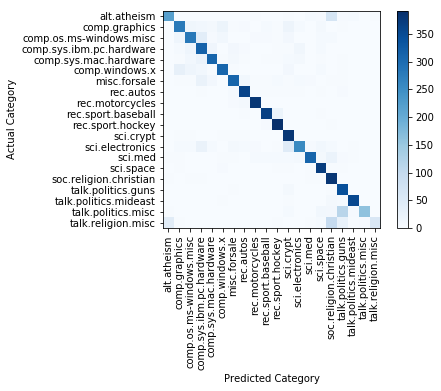

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(train.target_names))
plt.xticks(tick_marks, train.target_names, rotation=90)
plt.yticks(tick_marks, train.target_names)
plt.xlabel("Predicted Category")
plt.ylabel("Actual Category")
plt.show()

A strong diagonal line of high values where the predicted label intersects with the actual label indicates that the model is performing well.

### Using the Model with New Data
Now that we have a working model, we can use it to predict the class of new documents:

In [34]:
# Create a new data set that contains two new (very short) documents
new_data = ['I love my new Jaguar E-Pace. A great drive, and really comfortable interior.',
            'Go Mariners! This could be our season!']

# Use the model to predict the classes of the new documents
new_predictions = text_clf.predict(new_data)

# Show the predicted classes
for prediction in new_predictions:
    print(test.target_names[prediction])

rec.autos
rec.sport.baseball


## Word Embedding
In the text classification example above, we used the **CountVectorizer** and **TfidfTransformer** classes to convert the words in our text to a matrix of numeric values (counts per document and TDF/IF scores for each word respectively).Encoding words as numeric values like this is known as *word embedding*; and its the basis of many moders text analytics techniques.

Let's take a a closer look at word embedding using counts by calculating a matrix of word counts per sentence in the first verse of William Blake's Tiger poem:

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
import pandas as pd

poem = "Tiger Tiger burning bright, \
In the forests of the night. \
What immortal hand or eye \
Could frame thy fearful symmetry?"

sentences = nltk.sent_tokenize(poem)
for sentence in sentences:
    sentence = ''.join(c for c in sentence if not c.isdigit())
    sentence = ''.join(c for c in sentence if c not in punctuation)

m = CountVectorizer(analyzer='word', stop_words='english')

v = m.fit_transform(sentences)
df = pd.DataFrame(data=v.toarray(), columns=m.get_feature_names()) 
df

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,bright,burning,eye,fearful,forests,frame,hand,immortal,night,symmetry,thy,tiger
0,1,1,0,0,1,0,0,0,1,0,0,2
1,0,0,1,1,0,1,1,1,0,1,1,0


The resulting matrix contains a row for each sentence (numbered 0 and 1), and a column for each word. The numeric values indicate the freqency of each word in each sentence. This approach to word embedding is sometimes referred to as *one-hot encoding*, because each column indicates the presence and weight of a word by a non-zero value - marking it as "hot" in the sentences or documents in which it appears.

Count-based word embeddings like this are the basis of most statistical machine learning models for processing text, and as we've seen, they can be effective at enabling us to create models that classify text. However, the matrices themselves a *sparse* - that is, when we have a lot of documents containing a lot of words, we end up with 0's in a lot of the matrix cells. Additionally, the counts themselves don't tell us much about the relationships between the words - just their comparative frequency in the text.

Most recent advances in text-analytics make use of more sophisticated word embedding techniques that use *Deep Learning* neural network-based models to derive word vectors that encode semantic relationships between words. Example of this approach include Google's *Word2Vec* algorithm and Stanford's *Global Vectors for Word Embeddings (GloVe)* algorithm. Let's take a look at Word2Vec using the implementation in the **gensim** package.

In [36]:
!pip install gensim


import gensim
import nltk
nltk.download("punkt")
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation

# Array of word arrays
sentence_words = []

poem = "Tiger Tiger burning bright, \
In the forests of the night. \
What immortal hand or eye \
Could frame thy fearful symmetry?"

# Split the poem into sentences
sentences = nltk.sent_tokenize(poem)

for sentence in sentences:
    # normalize the sentences and then split them into words
    sentence = ''.join(c for c in sentence if not c.isdigit())
    sentence = ''.join(c for c in sentence if c not in punctuation).lower()
    sentence = ' '.join([word for word in sentence.split() if word not in (stopwords.words('english'))])
    sentence_words.append(nltk.word_tokenize(sentence))

# Train a Word2Vec mode to generate a 3-dimensional vector for each word
w2v_model = gensim.models.Word2Vec(sentence_words, min_count=1, size=3)

# Find each word in the model, and print its vector
words = list(w2v_model.wv.vocab)
for word in words:
    print("\n",word, ":", w2v_model[word])


    100% |████████████████████████████████| 24.2MB 170kB/s ta 0:00:011  10% |███▌                            | 2.6MB 7.5MB/s eta 0:00:03    32% |██████████▌                     | 8.0MB 6.2MB/s eta 0:00:03    42% |█████████████▊                  | 10.4MB 9.5MB/s eta 0:00:02    74% |████████████████████████        | 18.1MB 5.4MB/s eta 0:00:02    88% |████████████████████████████▌   | 21.5MB 4.9MB/s eta 0:00:01    97% |███████████████████████████████ | 23.5MB 4.4MB/s eta 0:00:01
    100% |████████████████████████████████| 40kB 809kB/s ta 0:00:01
  Stored in directory: /home/nbuser/.cache/pip/wheels/f7/a6/ff/9ab5842c14e50e95a06a4675b0b4a689c9cab6064dac2b01d0
Successfully built smart-open
[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/nbuser/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

 tiger : [-0.10733602 -0.11524136  0.02027336]

 burning : [ 0

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:35: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


The output includes a vector for each word in the text. You can think of the vector as defining a point in n-dimensional space (in this case 3-dimensional) that represents the "position" of the word relative to the other words in the corpus.

We can use principle component analysis to visualize these positions in a  2-dimensional plot:

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


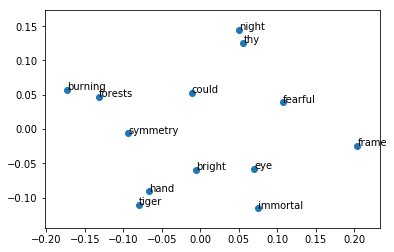

In [37]:
from sklearn.decomposition import PCA
from matplotlib import pyplot

%matplotlib inline

# fit a 2d PCA model to the vectors
X = w2v_model[w2v_model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(w2v_model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

So how does this help? Well, by defining the relative positions of each word as multi-dimensional vectors, we can find semantic relationships between the words - for example, you would expect related words like "woman", "girl", wife", "mother" to be near each other.

To see this in practice, we'll need to train a word2vec model using a much larger volume of text and with larger vectors (defining more *dimensions* in our contextual space). The actual training is accomplished by submitting a one-hot-encoded vector for each word to a neural hetwork that will find the probability of a word being collocated (appearing within a specified number of words) with each other word in the text. In the course of finding these probabilities, the neural network training algorithm will adjust the vector weights assigned to words in a hidden layer of the network as it iteratively trains the model over multiple *epochs*. Eventually, these weights will give us the vector representations for the word embeddings. You can find out more about the details of this in Chris McCormick's excellent article at http://mccormickml.com/2016/04/19/word2vec-tutorial-the-skip-gram-model/.

Let's train a model using a variety of texts from *Project Gutenberg* (an online project to digitize historically significant books).

In [38]:
import gensim, logging
import nltk
nltk.download("punkt")
from nltk.corpus import gutenberg
nltk.download("gutenberg")

sentence_tokens = []

for fileid in gutenberg.fileids():
    print(fileid)
    sentences = gutenberg.sents(fileid)
    for sentence in sentences:
        sentence_tokens.append(sentence)

# Turn on loggng to info so we can see the training process
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# train word2vec to include words that occur 3 times or more
# We'll create 500-dimensional vectors over 12 epochs
# The maximum distance beween related words is 10
vec_model = gensim.models.Word2Vec(sentence_tokens, min_count=3, size=500, window=10, iter=12)

print("model trained!")

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /home/nbuser/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


2019-02-19 22:43:41,332 : INFO : collecting all words and their counts
2019-02-19 22:43:41,341 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-02-19 22:43:41,750 : INFO : PROGRESS: at sentence #10000, processed 256693 words, keeping 9207 word types
2019-02-19 22:43:42,229 : INFO : PROGRESS: at sentence #20000, processed 567137 words, keeping 13603 word types
2019-02-19 22:43:42,784 : INFO : PROGRESS: at sentence #30000, processed 918759 words, keeping 17616 word types
2019-02-19 22:43:43,276 : INFO : PROGRESS: at sentence #40000, processed 1236460 words, keeping 19579 word types
2019-02-19 22:43:43,750 : INFO : PROGRESS: at sentence #50000, processed 1508401 words, keeping 22623 word types
2019-02-19 22:43:44,132 : INFO : PROGRESS: at sentence #60000, processed 1715918 words, keeping 27910 word types
2019-02-19 22:43:44,487 : INFO : PROGRESS: at sentence #70000, processed 1915119 words, keeping 30708 word types
2019-02-19 22:43:44,893 : INFO : PROGRESS: 

2019-02-19 22:44:55,224 : INFO : EPOCH 2 - PROGRESS: at 46.24% examples, 45722 words/s, in_qsize 6, out_qsize 0
2019-02-19 22:44:56,227 : INFO : EPOCH 2 - PROGRESS: at 49.13% examples, 45858 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:44:57,531 : INFO : EPOCH 2 - PROGRESS: at 53.24% examples, 45763 words/s, in_qsize 6, out_qsize 2
2019-02-19 22:44:58,596 : INFO : EPOCH 2 - PROGRESS: at 57.24% examples, 46091 words/s, in_qsize 6, out_qsize 0
2019-02-19 22:44:59,766 : INFO : EPOCH 2 - PROGRESS: at 60.88% examples, 46211 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:45:00,899 : INFO : EPOCH 2 - PROGRESS: at 64.98% examples, 46391 words/s, in_qsize 6, out_qsize 0
2019-02-19 22:45:02,049 : INFO : EPOCH 2 - PROGRESS: at 68.42% examples, 46509 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:45:03,136 : INFO : EPOCH 2 - PROGRESS: at 72.57% examples, 46473 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:45:04,306 : INFO : EPOCH 2 - PROGRESS: at 76.45% examples, 46549 words/s, in_qsize 5, out_

2019-02-19 22:46:09,236 : INFO : EPOCH 4 - PROGRESS: at 42.31% examples, 48105 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:46:10,465 : INFO : EPOCH 4 - PROGRESS: at 45.06% examples, 47911 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:46:11,501 : INFO : EPOCH 4 - PROGRESS: at 47.46% examples, 48168 words/s, in_qsize 6, out_qsize 0
2019-02-19 22:46:12,504 : INFO : EPOCH 4 - PROGRESS: at 51.64% examples, 48566 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:46:13,605 : INFO : EPOCH 4 - PROGRESS: at 55.41% examples, 48424 words/s, in_qsize 6, out_qsize 0
2019-02-19 22:46:14,740 : INFO : EPOCH 4 - PROGRESS: at 58.75% examples, 48217 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:46:15,819 : INFO : EPOCH 4 - PROGRESS: at 61.82% examples, 48131 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:46:17,039 : INFO : EPOCH 4 - PROGRESS: at 66.05% examples, 48072 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:46:18,188 : INFO : EPOCH 4 - PROGRESS: at 69.80% examples, 48126 words/s, in_qsize 5, out_

2019-02-19 22:47:21,959 : INFO : EPOCH 6 - PROGRESS: at 57.77% examples, 56442 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:47:23,014 : INFO : EPOCH 6 - PROGRESS: at 60.96% examples, 55993 words/s, in_qsize 6, out_qsize 0
2019-02-19 22:47:24,122 : INFO : EPOCH 6 - PROGRESS: at 65.61% examples, 56091 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:47:25,155 : INFO : EPOCH 6 - PROGRESS: at 69.50% examples, 56331 words/s, in_qsize 4, out_qsize 1
2019-02-19 22:47:26,173 : INFO : EPOCH 6 - PROGRESS: at 74.23% examples, 56312 words/s, in_qsize 4, out_qsize 1
2019-02-19 22:47:27,242 : INFO : EPOCH 6 - PROGRESS: at 77.65% examples, 56149 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:47:28,417 : INFO : EPOCH 6 - PROGRESS: at 81.19% examples, 56031 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:47:29,495 : INFO : EPOCH 6 - PROGRESS: at 84.00% examples, 55860 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:47:30,604 : INFO : EPOCH 6 - PROGRESS: at 87.12% examples, 55916 words/s, in_qsize 5, out_

2019-02-19 22:48:35,793 : INFO : EPOCH 8 - PROGRESS: at 62.88% examples, 48753 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:48:37,005 : INFO : EPOCH 8 - PROGRESS: at 66.84% examples, 48671 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:48:38,202 : INFO : EPOCH 8 - PROGRESS: at 71.16% examples, 48603 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:48:39,272 : INFO : EPOCH 8 - PROGRESS: at 75.53% examples, 49025 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:48:40,518 : INFO : EPOCH 8 - PROGRESS: at 79.37% examples, 49084 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:48:41,520 : INFO : EPOCH 8 - PROGRESS: at 82.26% examples, 49300 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:48:42,557 : INFO : EPOCH 8 - PROGRESS: at 84.80% examples, 49216 words/s, in_qsize 4, out_qsize 1
2019-02-19 22:48:43,640 : INFO : EPOCH 8 - PROGRESS: at 87.34% examples, 49333 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:48:44,657 : INFO : EPOCH 8 - PROGRESS: at 89.42% examples, 49305 words/s, in_qsize 5, out_

2019-02-19 22:49:49,647 : INFO : EPOCH 10 - PROGRESS: at 86.55% examples, 56723 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:49:50,732 : INFO : EPOCH 10 - PROGRESS: at 87.89% examples, 56324 words/s, in_qsize 6, out_qsize 0
2019-02-19 22:49:51,765 : INFO : EPOCH 10 - PROGRESS: at 92.95% examples, 56237 words/s, in_qsize 6, out_qsize 0
2019-02-19 22:49:52,936 : INFO : EPOCH 10 - PROGRESS: at 97.21% examples, 56066 words/s, in_qsize 5, out_qsize 0
2019-02-19 22:49:53,865 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-02-19 22:49:54,023 : INFO : EPOCH 10 - PROGRESS: at 99.76% examples, 56097 words/s, in_qsize 1, out_qsize 1
2019-02-19 22:49:54,031 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-02-19 22:49:54,040 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-02-19 22:49:54,041 : INFO : EPOCH - 10 : training on 2621785 raw words (1827620 effective words) took 32.5s, 56248 effective words/s
2019-02-19 22:49:55,191 

2019-02-19 22:51:01,488 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-02-19 22:51:01,634 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-02-19 22:51:01,691 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-02-19 22:51:01,700 : INFO : EPOCH - 12 : training on 2621785 raw words (1825775 effective words) took 35.5s, 51365 effective words/s
2019-02-19 22:51:01,707 : INFO : training on a 31461420 raw words (21919033 effective words) took 425.4s, 51524 effective words/s


model trained!


Now, let's query our model and find the top 3 words that are similar to "man".

*(if a warning about type conversion is displayed, you can ignore it!)*

In [39]:
try:
    print(vec_model.wv.most_similar(positive="man", topn=3))
except Exception as ex:
    print(ex)

2019-02-19 22:51:07,444 : INFO : precomputing L2-norms of word weight vectors


[('person', 0.6781350374221802), ('woman', 0.5695133805274963), ('gentleman', 0.5685442686080933)]


OK, what are the 3 most similar words to "woman"?

In [40]:
try:
    print(vec_model.wv.most_similar(positive="woman", topn=3))
except Exception as ex:
    print(ex)

[('lady', 0.7256807684898376), ('girl', 0.6625826358795166), ('child', 0.6439361572265625)]


Let's try something a little more complex, let's find similar words to "woman" and "father" that are not similar to "man". Another way to think about this is, * **woman** is to **???** as **man** is to **father** *.

In [41]:
try:
    print(vec_model.wv.most_similar(positive=["woman", "father"], negative=["man"], topn=3))
except Exception as ex:
    print(ex)

[('mother', 0.730557918548584), ('sister', 0.7226352095603943), ('husband', 0.7142006754875183)]


OK, how about the other way around? * **man** is to **???** as **woman** is to **mother** *.

In [42]:
try:
    print(vec_model.wv.most_similar(positive=["man", "mother"], negative=["woman"], topn=3))
except Exception as ex:
    print(ex)

[('father', 0.6297397613525391), ('brother', 0.5702896118164062), ('master', 0.5421998500823975)]


How about * **man** is to **???** as **woman** is to **queen** *?

In [43]:
try:
    print(vec_model.wv.most_similar(positive=["man", "queen"], negative=["woman"], topn=3))
except Exception as ex:
    print(ex)

[('king', 0.5152169466018677), ('Solomon', 0.47591426968574524), ('priest', 0.4738014340400696)]


And vice-versa: * **woman** is to **???** as **man** is to **king** *?

In [44]:
try:
    print(vec_model.wv.most_similar(positive=["woman", "king"], negative=["man"], topn=3))
except Exception as ex:
    print(ex)

[('daughter', 0.5806741714477539), ('queen', 0.5728534460067749), ('Esther', 0.5270494818687439)]


How about * **she** is to **???** as **he** is to **his** *?

In [45]:
try:
    print(vec_model.wv.most_similar(positive=["she", "his"], negative=["he"], topn=3))
except Exception as ex:
    print(ex)

[('her', 0.8057565093040466), ('herself', 0.6234375238418579), ('Her', 0.6186090707778931)]


Another thing we can use the model for is to predict matches and non-matches. So for example, we can find the odd one out:

In [46]:
try:
    print(vec_model.wv.doesnt_match("cat flower horse dog".split()))
except Exception as ex:
    print(ex)

flower


## Learn More
You can learn more about NLTK from the [NLTK Book](http://www.nltk.org/book/).
For more information about using SciKit-Learn to work with text data, see the [SciKit-Learn documentation](http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html). To learn about using Word2Vec in Gensim, see the [Gensim Documentation](https://radimrehurek.com/gensim/models/word2vec.html)